# Marketing Campaign Effectiveness (Fast Food)

###### Quickly analyze test market campaigns based on responses, revenue and other key metrics. Predict who will respond to which campaign by which channel and why. Increase the likelihood of responses and quality of leads in future campaigns.

In [24]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# 1 Get the Data

In [25]:
df = pd.read_csv('03 WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.drop(['LocationID','AgeOfStore','week'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
Promotion           548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.2+ KB


# 2a MarketID & Promotion

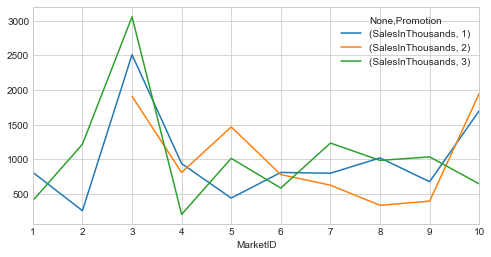

In [26]:
temp = df.pivot_table(values=['SalesInThousands'], index=['MarketID'], columns=['Promotion'], aggfunc='sum')
temp.plot(figsize=(8,4))

# 2b MarketSize & Promotion

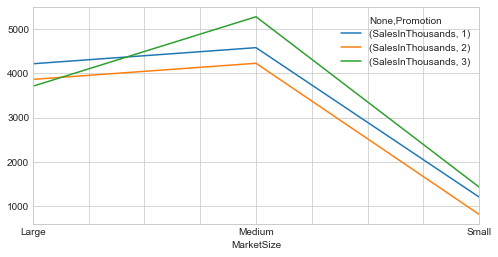

In [27]:
temp = df.pivot_table(values=['SalesInThousands'], index=['MarketSize'], columns=['Promotion'], aggfunc='sum')
temp.plot(figsize=(8,4))

# 3 Train Test Split

In [28]:
cat_feats = ['MarketID','MarketSize','Promotion']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [29]:
x = final_data.drop(['SalesInThousands'],axis=1)
y = final_data['SalesInThousands']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

In [30]:
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     327.4
Date:                Fri, 17 Nov 2017   Prob (F-statistic):          2.14e-183
Time:                        02:01:27   Log-Likelihood:                -1168.8
No. Observations:                 383   AIC:                             2362.
Df Residuals:                     371   BIC:                             2409.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.4425      0.42

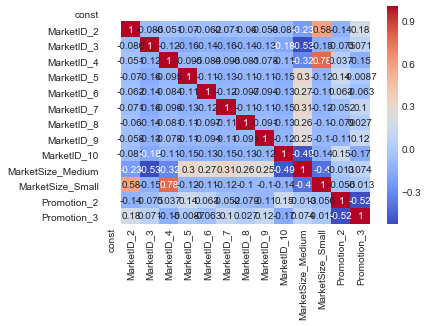

In [31]:
sns.heatmap(x_train.corr(),cmap='coolwarm',annot=True)

# 5 Predictions and Evaluation

In [32]:
x_test = sm.add_constant(x_test).copy()
y_pred = est.predict(x_test)

print('BIAS:', round(np.mean(y_test - y_pred),2))
print('MAPE:', round(np.mean(np.absolute((y_test - y_pred)/y_test))*100,2), "%")

BIAS: 0.68
MAPE: 8.95 %


Text(0,0.5,'Predicted Y')

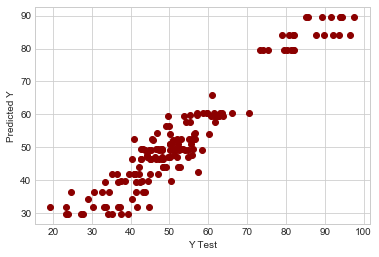

In [33]:
plt.scatter(y_test,y_pred,color='darkred')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')